In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

In [2]:
model_A = pd.read_csv('model_data/model-A-801.23814.csv')
model_B = pd.read_csv('model_data/model-B-801.71289.csv')
model_C = pd.read_csv('model_data/model-C-801.30940.csv')
model_D = pd.read_csv('model_data/model-D-802.04369.csv')
model_E = pd.read_csv('model_data/model-E-802.18756.csv')
model_F = pd.read_csv('model_data/model-F-803.57471.csv')
model_G = pd.read_csv('model_data/model-G-806.16588.csv')
model_H = pd.read_csv('model_data/model-H-807.25032.csv')

In [3]:
clfs = [model_A, model_B, model_C, model_D, model_E, model_F,model_G, model_H]


In [4]:
import os
file_list = sorted(os.listdir('model_data'))
file_list


['model-A-801.23814.csv',
 'model-B-801.71289.csv',
 'model-C-801.30940.csv',
 'model-D-802.04369.csv',
 'model-E-802.18756.csv',
 'model-F-803.57471.csv',
 'model-G-806.16588.csv',
 'model-H-807.25032.csv']

In [5]:
name_list = []
score_list = []

for file in file_list:
    name = file[:7]
    name_list.append(name)

    score = file[8:17]
    score_list.append(score)

In [6]:
name_list 

['model-A',
 'model-B',
 'model-C',
 'model-D',
 'model-E',
 'model-F',
 'model-G',
 'model-H']

In [7]:
score_list

['801.23814',
 '801.71289',
 '801.30940',
 '802.04369',
 '802.18756',
 '803.57471',
 '806.16588',
 '807.25032']

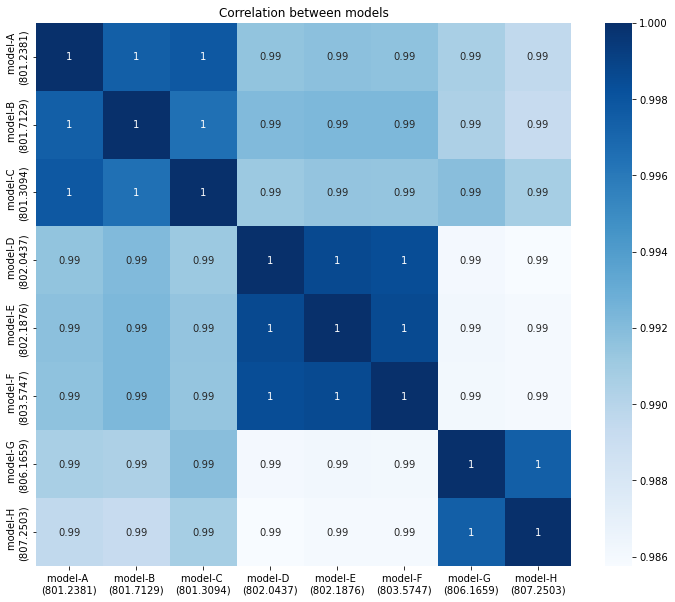

In [8]:
pred_results = []
count = 0

for clf in clfs:
    pred = clf['Salary']
    for i in range(len(file_list)):
        if i == count:
            name = name_list[i]
            score = float(score_list[i])
    pred_results.append(pd.Series(pred, name=f'{name} \n({score:.4f})'))
    count = count + 1

ensemble_results = pd.concat(pred_results, axis=1)
plt.figure(figsize=(12, 10))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

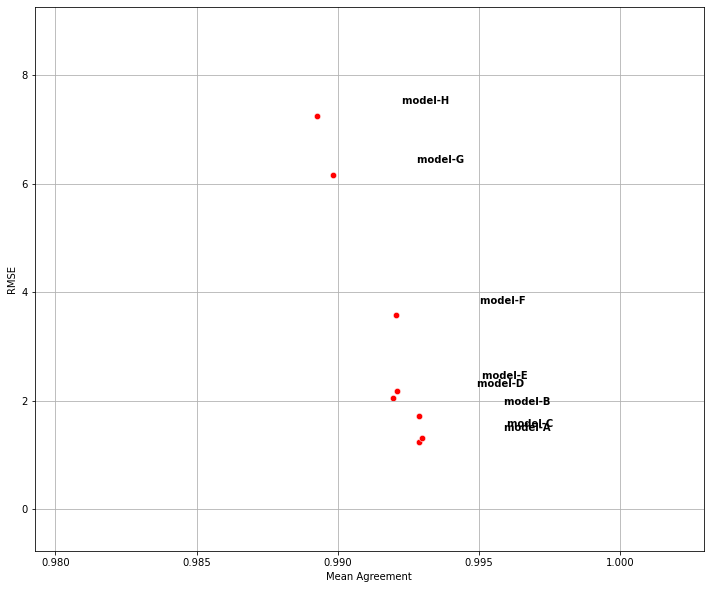

In [9]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index.str[:-10]
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})

plt.figure(figsize=(12, 10))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
    g.text(df.cor[line]+0.003, df.rmse[line]-0.001,
           df.model[line], horizontalalignment='left',
           size='medium', color='black', weight='semibold')

plt.xlim((df.cor.min()-0.01, df.cor.max()+0.01))
plt.ylim((df.rmse.min()-2, df.rmse.max()+2))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()


In [ ]:
from scipy.stats.mstats import gmean
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

# 아래 폴더가 있다는 가정 하에 수행
folder = 'submissions'
nf = 0
for f in os.listdir(folder):
    ext = os.path.splitext(f)[-1]
    if ext == '.csv':
        s = pd.read_csv(folder+"/"+f)
    else:
        continue
    if nf == 0:
        slist = s
    else:
        slist = pd.merge(slist, s, on="ID")
    nf += 1


p = 1

if nf >= 2:
    if p == 0:
        pred_lst = slist.drop(['ID'], axis=1)
        pred_lst = pred_lst.T.values
        pred = gmean(pred_lst, axis=0)

    else:
        pred = 0
        for j in range(nf):
            pred = pred + slist.iloc[:, j+1]**p
        pred = pred / nf
        pred = pred**(1/p)

    t = pd.Timestamp.now()
    fname = f"p{p}mean_submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv"
    pd.DataFrame({'ID': slist.ID, 'Salary': pred}).to_csv(fname, index=False)
    print(f"'{fname}' is ready to submit.")
